# Watermarking Project by spread spectrum:
This Jupyter notebook implements the watermarking algorithms for 1D and 2D signals. 


In [2]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## 1. Watermarking by Spread Spectrum (1D Analysis)
This part of the project consists of watermarking an audio file. We'll follow the instructions of the project:

### 1.1 Watermark Creation

#### 1.1.1 Create the signature
    
First thing first, we want to create a private signature (char as proposed), that we will convert to its binary form. Then we'll convert each "0" of the binary string into "-1". That way we will obtain the wanted set of 8 bits ∈−1,1.

In [5]:
def char_to_bits(character):
    # Converting the character to its 8-bit binary representation
    ast = bin(ord(character))[2:].zfill(8)
    # Initializing an empty list for the signature
    a = []
    # Looping over each bit in the 8-bit string
    for bit in ast:
        # Converting '0' to -1
        if bit == '1':
            a.append(1)
        else:
            a.append(-1)
    # Returning the signature as the wanted set
    return a

Let's test the code on a character to see if it works. I'll chose the character I from ID or Imane ;)

In [8]:
# Example & Test: Converting character 'I' to bits
signature = char_to_bits('I')
print(f"Signature of 'I': {signature}")

Signature of 'I': [-1, 1, -1, -1, 1, -1, -1, 1]


Looks good, let's continue.

#### 1.1.2 Upsampling
The second step is upsampling the binary signature by a factor of 'cr' to create the sequence 'b' using the given formula :


                            b[k] = a[n] for n.cr≤k<(n+ 1).cr
                            

Let's analyze this formula: 

b[k] is the upsampled signal that we want to construct based on the a[n] which is the original binary signature using the 'cr' factor which is how many times each bit of the binary signature is repeated.
Let's code the function based on that:

In [11]:
def upsample(a, cr):
    # Initialize an empty list for the upsampled sequence
    b = []
    # Repeating each element in a for cr times
    for n in a:
        b += [n] * cr
    return b

Let's check if the code works on an example ( character I as usual)

In [13]:
# Example & Test upsampling the signature from the character I using cr = 1024
signature = char_to_bits('I')
cr = 1024
b = upsample(signature, cr)
print(f"Upsampled signature : {b}")

Upsampled signature : [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

### 1.2 Modulation

Now we'll create the pseudo-random sequence p[.] for the modulation.
As explained in the project, p is a pseudo-random sequence with a mean equals to 0 and a standard deviation equals to 1 for each period "cr". This sequence is created from the private key clef_P and the length of p is equal to the length of b.

In [15]:
# creating the Gaussian pseudo-random sequence
def create_gaussian_sequence(length, Clef_P):
    rng = np.random.default_rng(Clef_P)
    return rng.normal(0, 1, length)

# Creating the Gaussian modulation sequence for length = len(b) using seed = 8
p = create_gaussian_sequence(len(b), 8)
print(f"Gaussian sequence: {p}")

Gaussian sequence: [-1.7382664  -1.33664279 -1.36110671 ...  0.72172364  0.27615363
 -0.72175917]


Let's analyze the proposed commands to understand what's happening there:

In [17]:
#Step 1
Clef_P = 8
rng = np.random.default_rng(seed=Clef_P)
a1 = rng.normal(0, 1, 4)
print(a1)

#Step 2:
a2 = rng.normal(0, 1, 4)
print(a2)

#Step 3:
rng = np.random.default_rng(seed=Clef_P)
a3 = rng.normal(0, 1, 4)
print(a3)

[-1.7382664  -1.33664279 -1.36110671 -0.35161713]
[-2.31258158 -0.1888972  -0.95722923  0.89360018]
[-1.7382664  -1.33664279 -1.36110671 -0.35161713]


- Step1: As we can see, at first we set the private key to 8. Then we initialized the random number generator with the seed Clef_P = 8. The random sequence a_1 of length 4 is generated using a normal (Gaussian) distribution with mean 0 and standard deviation 1. After printing it, we can see indeed that it's length is 4 and the values are indeed close to 0.

- Step 2: We then generate another random sequence a2 of lenght 4 as well using the Gaussian distribution again without resetting the generator. We can see after printing it that the generated sequence is different from a1.

- Step 3:The third sequence that uses again Clef_P as a seed is this time equal to a1. Indeed, This happens because we reseted the random number generator using the same seed Clef_P = 8.

=> As a Conclusion: Resetting the random generator to the same state using the same private key is essential in watermarking because it ensures the modulation sequence can be regenerated exactly when needed . If We know the key, We can always regenerate the same pseudo-random sequence for modulation or decoding. It's also essential for making the watermark unique. 

### 1.3 Study of the modulation.

The pattern b[.] is amplified and moduled by the pseudo-aleatoire sequence p[.] to obtain the watermark w :

                    w[k] = α.b[k].p[k]
                         = α.a[n].p[k] for n.cr≤k<(n+ 1).cr
                         
                         
#### 1.3.1 Create the watermark w[.] with α= 1.

In [19]:
def create_watermark(b, p, alpha=1):
    # Ensuring b and p are of the same length
    assert len(b) == len(p), "The sequences b and p must have the same length."
    # Initializing an empty list to hold the watermark sequence
    w = []
    # Multiplying the upsampled signature `b` with the modulation sequence `p`
    for k in range(len(b)):
        w.append(alpha * b[k] * p[k])
    return w

This function multiplies the upsampled signature by the modulation sequence and a scaling factor alpha . The result is the watermark that we will embed into our audio signal.


In [21]:
# creating the watermark using the function and checking if everything is alright

w = create_watermark(b, p, alpha=1)

print("First 5 elements of w:", w[:5])  # Printing only the first 5 elements to check
print("Length of w:", len(w))  # Checking the length of the watermark sequence

# We are expecting for w to have the same length as b and p which is 1024 * 8 = 8192


First 5 elements of w: [1.738266398496882, 1.3366427931811324, 1.361106708564987, 0.35161713127840977, 2.3125815796967033]
Length of w: 8192


Now let's Study, analyze and discuss the spectrum of b, p and w by Studying the behavior of the energy in
the frequency domain.

In [23]:
# Implementation using the given plot_spectre() function 

def plot_spectre(s, title): # adding a title for better visibility
    # Calculating the absolute value of the Fourier Transform of the sequence
    spec = np.abs(np.fft.fft(s))

    # Generating the frequency range (up to half of the spectrum)
    fr = np.arange(0, len(s) / 2) / len(s)

    # Plot of the spectrum
    plt.plot(fr, spec[0: int(len(spec) / 2)], label="Spectre")
    plt.legend()
    plt.xlabel("Frequency")
    plt.ylabel("Energy")
    plt.title(title)
    
    plt.show()
    
    

Let's plot the spectrums of b,p and w and analyze them

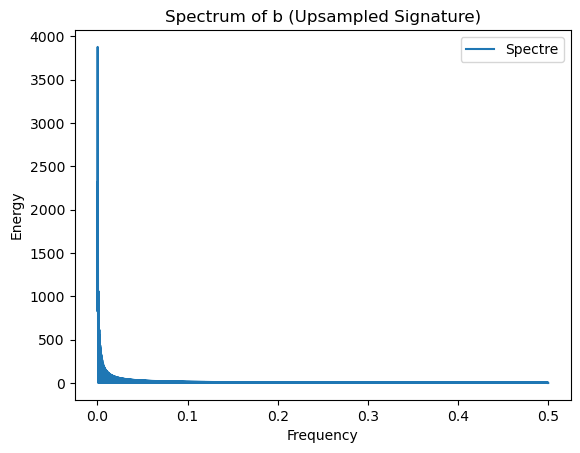

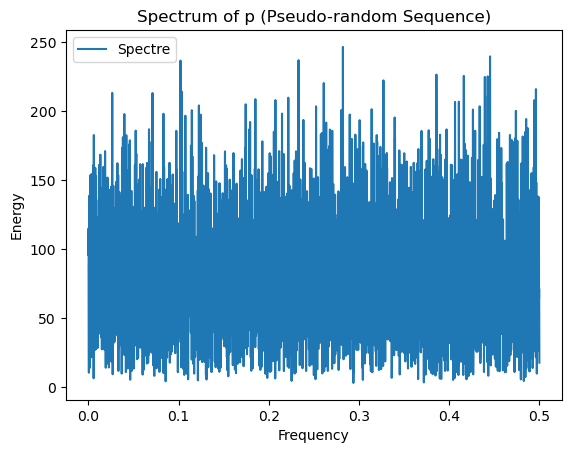

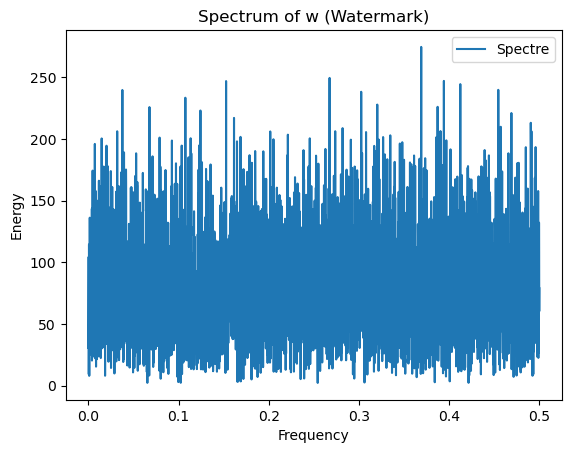

In [25]:
plot_spectre(b, title="Spectrum of b (Upsampled Signature)")
plot_spectre(p, title="Spectrum of p (Pseudo-random Sequence)")
plot_spectre(w, title="Spectrum of w (Watermark)")

### Analysis:
1. **Spectrum of the Upsampled Sequence b:**
   - This sequence is created by repeating each bit of the original signature 'cr' times. Because of the periodic nature of this sequence, we can see that the energy is concentrated at specific frequencies. It's easy to detect ! That's why we won't use it directly directly for watermarking if I understand well.


2. **Spectrum of the Gaussian Sequence p:**
   - This sequence is generated using a Gaussian distribution, with values having a mean of 0 and a standard deviation of 1 that's why the spectrum is spreading out evenly.
   

3. **Spectrum of the Watermark Sequence w:**
   - The watermark sequence 'w' is the product of 'b' and 'p'. This modulation spreads the energy of the upsampled sequence 'b' across a wider frequency range. The spectrum of 'w' therefore demonstrates the spread spectrum property, where the signal's energy is spread over a broader frequency band, making it less susceptible to interference and more difficult to detect.

Let's watermark our audio !
First thing first, we'll have to upload it , let's do that:
#### 1.3.3 Loading the signal

In [27]:
# Loading the audio signal and sampling frequency
samplerate, s = wavfile.read("test.wav")

#### 1.3.4 Watermarking the signal

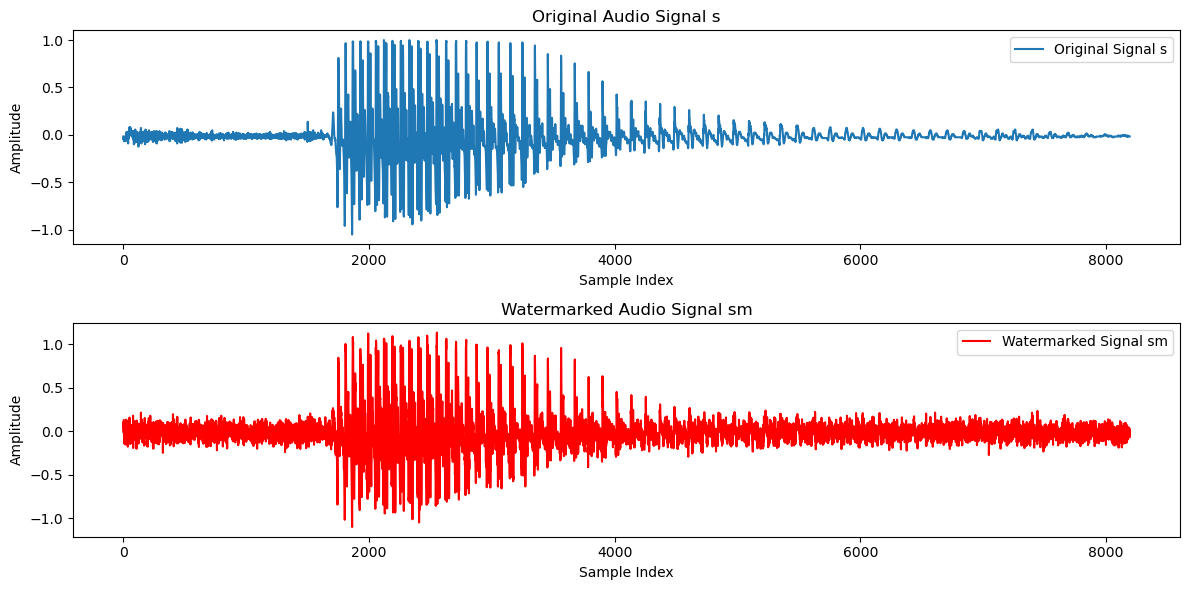

Sampling frequency (samplerate): 11025 Hz
First 20 samples of original signal s: [-0.01639397 -0.0491819  -0.02459095 -0.04098492 -0.02459095 -0.02459095
 -0.06557587 -0.02459095 -0.04098492 -0.0491819  -0.02459095 -0.04098492
 -0.06557587 -0.04098492 -0.06557587 -0.02459095 -0.0491819  -0.05737889
 -0.01639397 -0.04098492]
First 20 samples of watermarked signal sm: [ 0.09949046  0.03992762  0.0661495  -0.01754378  0.12958115 -0.0119978
 -0.00176059 -0.0841643  -0.10477473 -0.14199912 -0.07575562 -0.0374496
 -0.12289547 -0.14135033 -0.0220029  -0.06528103 -0.04633698 -0.15338
  0.03939903 -0.02088181]


In [29]:
#Converting s and w to np arrays to avoid an error that I encountred

s = np.array(s)  
w = np.array(w)  

# Watermarking the audio signal using the given formula: sm[n] = s[n] + αw[n]
alpha = 1 / 15  
sm = s + alpha * w 

# Plotting the original and watermarked signals 
plt.figure(figsize=(12, 6))

# Original Signal Plot
plt.subplot(2, 1, 1)
plt.plot(s, label='Original Signal s')
plt.title("Original Audio Signal s")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Watermarked Signal Plot
plt.subplot(2, 1, 2)
plt.plot(sm, label='Watermarked Signal sm', color='red') # another color because why not
plt.title("Watermarked Audio Signal sm")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


wavfile.write("watermarked_test.wav", samplerate, sm.astype(np.float32)) #new watermarked file

# Output a summary of the results
print(f"Sampling frequency (samplerate): {samplerate} Hz")
print(f"First 20 samples of original signal s: {s[:20]}")
print(f"First 20 samples of watermarked signal sm: {sm[:20]}")

**Visual Analysis:**

- Original Signal s:

The original signal has a clean structure and regular amplitude variations. The waveform remains stable and smooth, indicating no visible distortions or irregularities.

- Watermarked Signal sm:

The watermarked signal appears slightly noisier compared to the original. The amplitude is slightly altered, and some high-frequency components seem more pronounced, which is likely the result of adding the pseudo-random watermark sequence w.

**Sound analysis**

After hearing both the original audio and the watermarked one, I can hear a bit of noise in the watermarked signal. This noise was expected due to introduction of the watermark. I'm wondering if changing the α value would lower/upper the noise sound. I may check that later.

Or even do it for a song yay !








### 1.4 Decoding:

#### 1.4.1 Testing the independance:



In [31]:
def test_independence(s, p, cr):
    # Ensure that s and p have the same length
    assert len(s) == len(p), "The original signal and pseudo-random sequence must have the same length."
    # Number of segments (each segment is of length `cr`)
    num_segments = len(s) // cr
    # Storing the independence values for each segment
    independence_values = []
    # Calculating the sum for each segment
    for n in range(num_segments):
        # Calculating the sum of p[k] * s[k] for the current segment
        independence_sum = sum(p[k] * s[k] for k in range(n * cr, (n + 1) * cr))
        # Normalizing by cr and storing the result
        normalized_value = independence_sum / cr
        independence_values.append(normalized_value)
    # Calculating the mean of the independence values
    mean_independence = np.mean(independence_values)
    
    return mean_independence, independence_values


In [35]:

# Testing the independence
mean_independence, independence_values = test_independence(s, p, cr)


print(f"Mean independence value: {mean_independence}")
print(f"Independence values for each segment: {independence_values[:10]}") 


Mean independence value: -0.00025242436011749107
Independence values for each segment: [0.0006171352789578765, 0.004229103116340672, 0.0019517901260565605, -0.006150658946291716, -0.0048559538863297905, 0.0004500134307567453, 0.0007458069214014429, 0.000993369078168281]


Excellent, the mean independence value is very close to zero and each value hovers around zero. Therefore we can say that s and p are indeed independent.

Let's now test the standard deviation of p



But first, Why do we want that?

Well, The watermarking process uses a pseudo-random sequence p that is supposed to have a mean of 0 and a standard deviation of 1. This ensures that p behaves like a Gaussian noise signal, which helps to spread the energy of the watermark evenly across frequencies. If the standard deviation is not 1, the strength and distribution of the watermark may not be ideal.

Let's implement a function that tests this and apply it on out values:

In [37]:
def check_standard_deviation(p, cr):
    # Number of segments (each segment is of length `cr`)
    num_segments = len(p) // cr
    # Calculating the mean-squared value for each segment
    std_results = []
    for n in range(num_segments):
        # Calculating the sum of squares for the current segment
        sum_squares = sum(p[k] ** 2 for k in range(n * cr, (n + 1) * cr))
        # Normalizing by cr to get the mean-squared value
        normalized_std = sum_squares / cr
        std_results.append(normalized_std)
    # Calculating the mean of the standard deviation results
    mean_std = np.mean(std_results)
    
    return mean_std, std_results

In [39]:
#test
# Checking the standard deviation over each segment of length cr
mean_std, std_results = check_standard_deviation(p, cr)


print(f"Mean standard deviation value: {mean_std}")
print(f"Standard deviation values for each segment: {std_results[:10]}") 


Mean standard deviation value: 0.9987336619830453
Standard deviation values for each segment: [1.0193999002855643, 1.0499137734231743, 1.0680276089802192, 1.017924901717538, 0.9050159203752279, 1.0301642818070096, 0.963880104804567, 0.9355428044710612]


Amazing, the result is approximatively 1, that's a good sign for us to say that things are working and that p was generated properly.

Lets test the next formula: 


what doest it mean? 

This formula tells us that the sign of the sum of p[k] * sm[k] over each segment should match the original binary signature a[n]. It means that by demodulating the watermarked signal sm using p, we should be able to recover the original signature a.

In [43]:
def decode_and_compare(sm, p, a, cr):

    # Number of segments (each segment is of length cr)
    num_segments = len(sm) // cr
    # Computing the decoded sequence sd[n]
    sd = []
    for n in range(num_segments):
        # Calculating the sum for the current segment
        segment_sum = sum(p[k] * sm[k] for k in range(n * cr, (n + 1) * cr))
        # Appending the normalized value to sd
        sd.append(segment_sum / cr)
    # Calculating the sign of sd
    decoded_a = np.sign(sd)
    # Replacing zeros with 1 (if any)
    decoded_a[decoded_a == 0] = 1

    # Comparing with the original binary signature a
    comparison = decoded_a == np.array(a)
    accuracy = np.sum(comparison) / len(a) 
    
    return decoded_a, accuracy

In [45]:
#test:

# Decoding the watermark and comparing it with the original signature
decoded_signature, decoding_accuracy = decode_and_compare(sm, p, signature, cr)  # Uncomment and use actual variables

print(f"Decoded signature: {decoded_signature}")
print(f"Decoding accuracy: {decoding_accuracy * 100:.2f}%")

Decoded signature: [-1.  1. -1. -1.  1. -1. -1.  1.]
Decoding accuracy: 100.00%


Great, let's move on

In [47]:
def tatoue1d(sens, s, ID, rng, alpha=1):

    # Converting the character `ID` to an 8-bit binary sequence a
    a = char_to_bits(ID) 
    #  Calculating the upsampling factor
    cr = int(np.size(s) / 8) 
    
    if sens == 0:
        # Watermarking process
        print("Watermarking process...")
        #  Upsampling a to obtain b
        b = upsample(a, cr)  
        # Creating the Gaussian sequence p using the random generator
        p = rng.normal(0, 1, len(b))
        
        # Creating the watermark w
        w = create_watermark(b, p, alpha)
        
        # Watermarking the original signal s to get res
        res = s + w 
        
        return res, a

    elif sens == 1:
        # Decoding process
        print("Decoding process...")
        # Creating the Gaussian sequence p using the random generator
        p = rng.normal(0, 1, len(s))
        # Decoding the watermark and compare with a
        decoded_a, accuracy = decode_and_compare(s, p, a, cr)
        print(f"Decoding accuracy: {accuracy * 100:.2f}%")
        
        return decoded_a, a

In [49]:
# Example
rng = np.random.default_rng(seed=42)
s = np.random.normal(0, 1, 8192)

# Watermarking Process
s_m, S = tatoue1d(0, s, 'g', rng, alpha=1/15)

# Resetting the random generator to ensure the same sequence p
rng = np.random.default_rng(seed=42)

# Decoding Process
S_d, S = tatoue1d(1, s_m, 'g', rng)


Watermarking process...
Decoding process...
Decoding accuracy: 100.00%


Let's test the watermarking procedure with our audio signal

In [51]:

# Load the actual audio signal and its sampling rate
samplerate, s_audio = wavfile.read("test.wav")

# Check if the audio is stereo or mono, and use only one channel if stereo
if len(s_audio.shape) > 1:
    s_audio = s_audio[:, 0]  # Select the first channel if the audio is stereo

# Normalize the audio signal to range [-1, 1] if needed
s_audio = s_audio / np.max(np.abs(s_audio))

# Step 1: Watermarking the audio signal
print("Testing the watermarking procedure with the audio signal...")
rng = np.random.default_rng(seed=42)
s_m_audio, S = tatoue1d(0, s_audio, 'g', rng, alpha=1/15)

# Step 2: Decoding the watermark from the audio signal
rng = np.random.default_rng(seed=42)  # Reset the random generator to ensure the same p sequence
decoded_audio_signature, original_signature = tatoue1d(1, s_m_audio, 'g', rng)

# Step 3: Measure the number of bit errors
bit_errors = np.sum(np.array(original_signature) != np.array(decoded_audio_signature))
print(f"Number of bit errors: {bit_errors}")
print(f"Original signature: {original_signature}")
print(f"Decoded signature: {decoded_audio_signature}")

# Analyze the bit errors
if bit_errors > 0:
    print(f"There are {bit_errors} errors in the detected signature.")
    print("Possible explanations could be:")
    print("1. Noise in the audio signal may have altered the watermark.")
    print("2. The watermark strength (alpha) might be too low, making it hard to detect.")
    print("3. The audio file may have undergone some compression or modification that impacted the watermark.")
else:
    print("No errors found. The watermark was successfully detected!")


Testing the watermarking procedure with the audio signal...
Watermarking process...
Decoding process...
Decoding accuracy: 100.00%
Number of bit errors: 0
Original signature: [-1, 1, 1, -1, -1, 1, 1, 1]
Decoded signature: [-1.  1.  1. -1. -1.  1.  1.  1.]
No errors found. The watermark was successfully detected!


Let's test the detection procedure with invalid keys

In [53]:
#  Watermarking the audio signal with the original key (seed = 42)
rng = np.random.default_rng(seed=42)
# Watermarking process with the correct key
s_m_audio, S = tatoue1d(0, s_audio, 'g', rng, alpha=1/15)

#  Using  incorrect keys during the decoding process, and the correct one at the end to see if we'll have 0 errors
invalid_keys = [17, 23, 37, 47, 42]
for key in invalid_keys:
    print(f"\nTesting with invalid key (seed = {key})...")
    rng = np.random.default_rng(seed=key)
    
    # Decoding using the incorrect key
    decoded_audio_signature, original_signature = tatoue1d(1, s_m_audio, 'g', rng)
    
    # Measuring the number of bit errors
    bit_errors = np.sum(np.array(original_signature) != np.array(decoded_audio_signature))
    
    print(f"Number of bit errors with seed {key}: {bit_errors}")
    
    # Analyzing the results
    if bit_errors == len(original_signature):
        print("Complete mismatch: All bits are incorrect. This is expected with an incorrect key.")
    elif bit_errors > 0:
        print(f"Partial mismatch: {bit_errors} bits are incorrect. The key is not fully incorrect but still invalid.")
    else:
        print("Unexpected result: The key somehow detected the watermark correctly, which should not happen.")


Watermarking process...

Testing with invalid key (seed = 17)...
Decoding process...
Decoding accuracy: 62.50%
Number of bit errors with seed 17: 3
Partial mismatch: 3 bits are incorrect. The key is not fully incorrect but still invalid.

Testing with invalid key (seed = 23)...
Decoding process...
Decoding accuracy: 62.50%
Number of bit errors with seed 23: 3
Partial mismatch: 3 bits are incorrect. The key is not fully incorrect but still invalid.

Testing with invalid key (seed = 37)...
Decoding process...
Decoding accuracy: 50.00%
Number of bit errors with seed 37: 4
Partial mismatch: 4 bits are incorrect. The key is not fully incorrect but still invalid.

Testing with invalid key (seed = 47)...
Decoding process...
Decoding accuracy: 62.50%
Number of bit errors with seed 47: 3
Partial mismatch: 3 bits are incorrect. The key is not fully incorrect but still invalid.

Testing with invalid key (seed = 42)...
Decoding process...
Decoding accuracy: 100.00%
Number of bit errors with seed 4

the key is indeed 42 so it's not unexpected , looks good 

### 1.5 Robustness

Let's analyze the robustness of the watermarking procedure against some attacks

In [56]:
from scipy.signal import butter, lfilter

In [58]:
def apply_lowpass_filter(signal, fc, samplerate=1):

    # Creating a low-pass Butterworth filter
    num, den = butter(10, fc * 2, btype='low', analog=False)
    #  Applying the filter to the signal
    filtered_signal = lfilter(num, den, signal)
    
    return filtered_signal

def evaluate_lowpass_attack(s_m, a, rng, fc, ID):

    # Applying the low-pass filter to the watermarked signal
    filtered_sm = apply_lowpass_filter(s_m, fc)
    # Performing decoding on the filtered signal using the original random generator
    decoded_a, _ = tatoue1d(1, filtered_sm, ID, rng)
    # Calculating the bit error rate
    bit_errors = np.sum(np.array(a) != np.array(decoded_a))
    accuracy = (len(a) - bit_errors) / len(a)
    # Plotting the original and filtered signals
    plt.figure(figsize=(12, 4))
    plt.plot(s_m, label="Watermarked Signal (Original)", alpha=0.75)
    plt.plot(filtered_sm, label=f"Low-Pass Filtered Signal (fc={fc})", alpha=0.75)
    plt.title(f"Time Domain: Low-Pass Filter with fc={fc}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
    
    return decoded_a, accuracy



Watermarking process...

Testing Low-Pass Filter with fc = 0.3
Decoding process...
Decoding accuracy: 75.00%


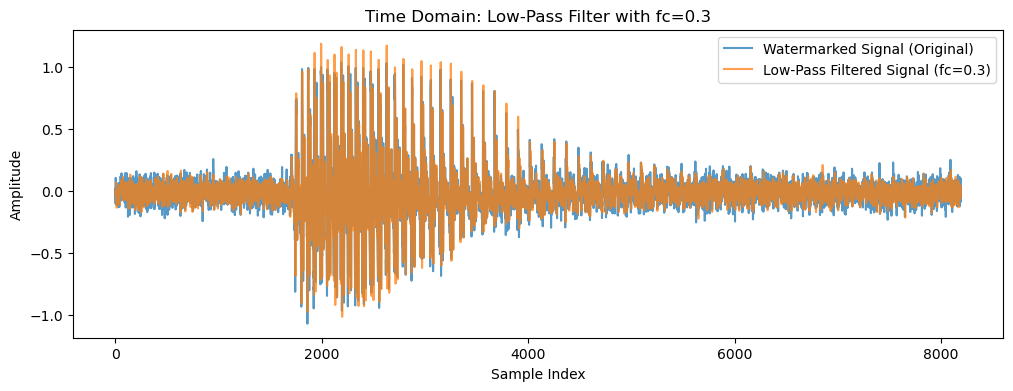

Detected Signature: [-1.  1. -1. -1. -1. -1.  1.  1.]
Detection Accuracy with Low-Pass Filter (fc=0.3): 75.00%

Testing Low-Pass Filter with fc = 0.1
Decoding process...
Decoding accuracy: 75.00%


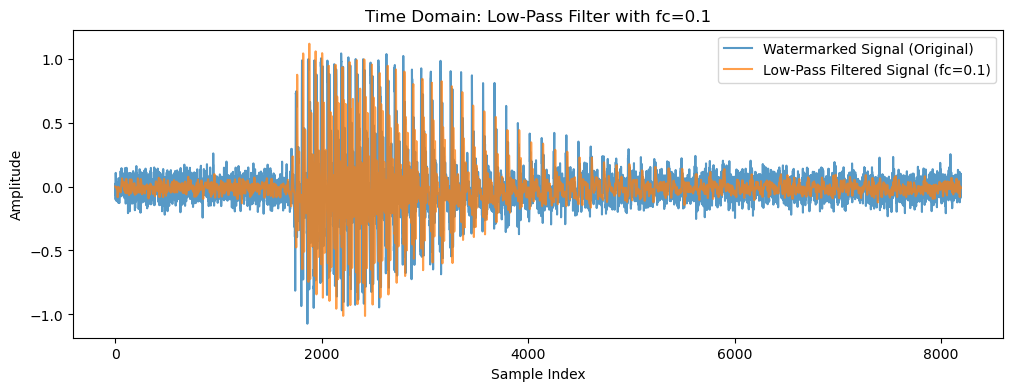

Detected Signature: [-1. -1.  1. -1. -1.  1. -1.  1.]
Detection Accuracy with Low-Pass Filter (fc=0.1): 75.00%


In [60]:

# Example

# Define the test parameters
frequencies = [0.3, 0.1]  # Low-pass filter cutoff frequencies to test
character = 'g'  # The character used to create the binary signature

# Watermarking the original audio signal `s_audio`
rng = np.random.default_rng(seed=42)
#watermarking the audio
s_m_audio, S = tatoue1d(0, s_audio, character, rng, alpha=1/15)

# Testing Low-Pass Filters
for fc in frequencies:
    print(f"\nTesting Low-Pass Filter with fc = {fc}")
    rng = np.random.default_rng(seed=42)  # Resetting the random generator 
    detected_signature, accuracy = evaluate_lowpass_attack(s_m_audio, S, rng, fc, character)
    print(f"Detected Signature: {detected_signature}")
    print(f"Detection Accuracy with Low-Pass Filter (fc={fc}): {accuracy * 100:.2f}%")

I have no clue on how to analyze these results (Check that later)


Let's move on to the second attack

In [62]:
def apply_highpass_filter(signal, fc, samplerate=1):

    # Creating a high-pass Butterworth filter this time
    num, den = butter(10, fc * 2, btype='high', analog=False)
    # Applying the filter to the signal
    filtered_signal = lfilter(num, den, signal)
    
    return filtered_signal

def evaluate_highpass_attack(s_m, a, rng, fc, ID):

    # Applying the high-pass filter to the watermarked signal
    filtered_sm = apply_highpass_filter(s_m, fc)
    # Decoding the filtered signal
    decoded_a, _ = tatoue1d(1, filtered_sm, ID, rng)
    
    # Calculating the bit error rate
    bit_errors = np.sum(np.array(a) != np.array(decoded_a))
    accuracy = (len(a) - bit_errors) / len(a)
    
    #Plotting the original and filtered signals for comparison in the time domain
    plt.figure(figsize=(12, 4))
    plt.plot(s_m, label="Watermarked Signal (Original)", alpha=0.75)
    plt.plot(filtered_sm, label=f"High-Pass Filtered Signal (fc={fc})", alpha=0.75)
    plt.title(f"Time Domain: High-Pass Filter with fc={fc}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()
    
    # Plotting the frequency spectrum for comparison in the frequency domain
    plot_spectre(s_m, title="Spectrum of Watermarked Signal (Original)")
    plot_spectre(filtered_sm, title=f"Spectrum of High-Pass Filtered Signal (fc={fc})")
    
    return decoded_a, accuracy



Watermarking process...

Testing High-Pass Filter with fc = 0.2
Decoding process...
Decoding accuracy: 75.00%


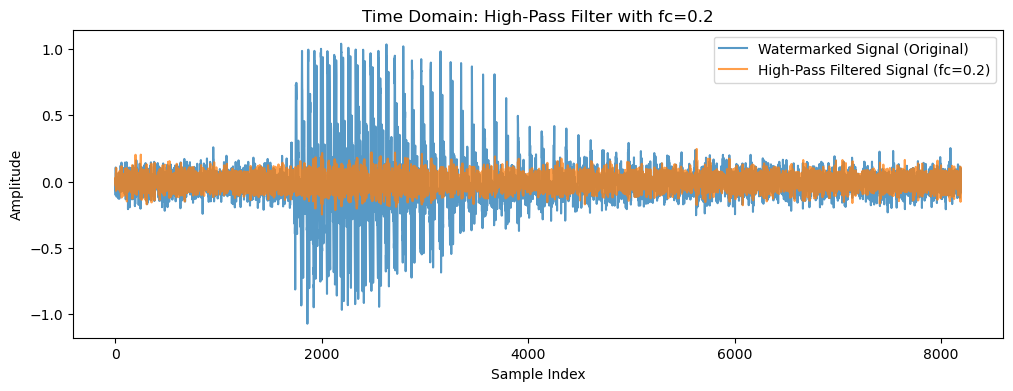

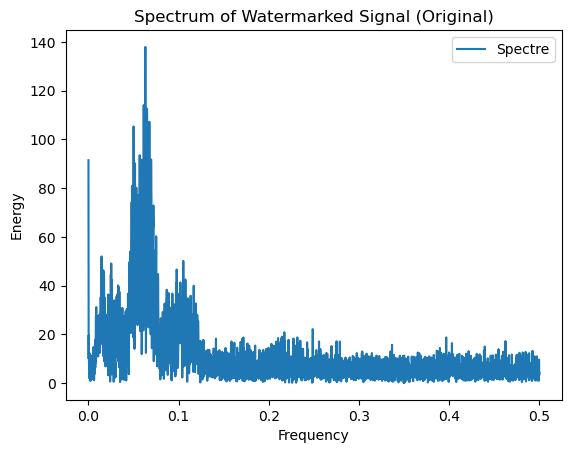

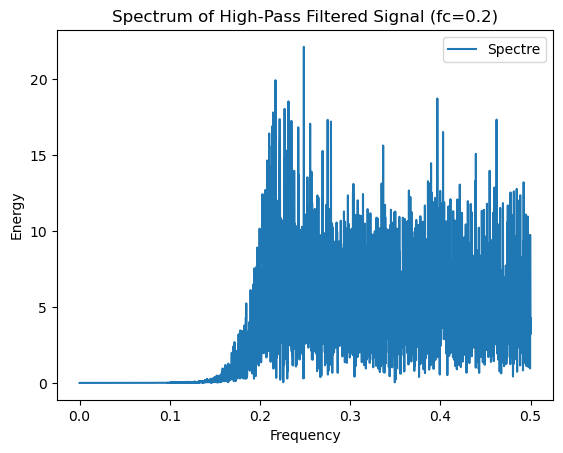

Detected Signature: [ 1.  1. -1. -1. -1.  1.  1.  1.]
Detection Accuracy with High-Pass Filter (fc=0.2): 75.00%

Testing High-Pass Filter with fc = 0.4
Decoding process...
Decoding accuracy: 37.50%


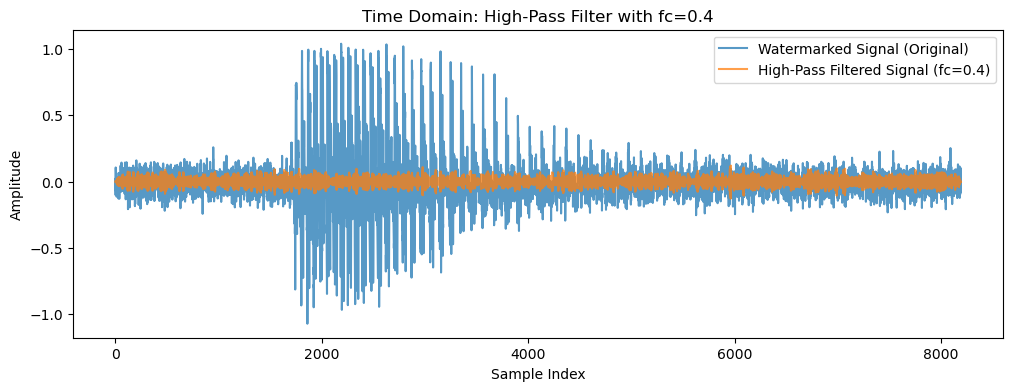

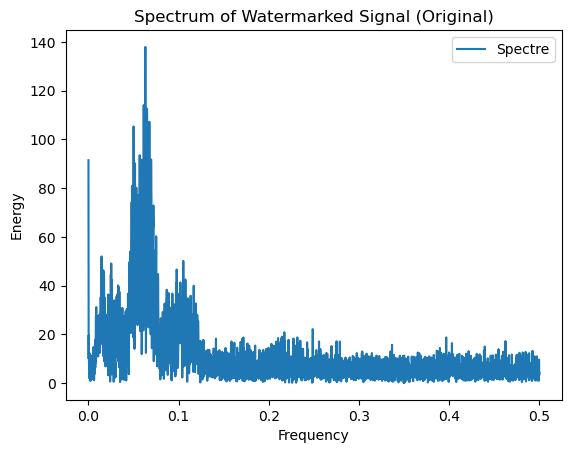

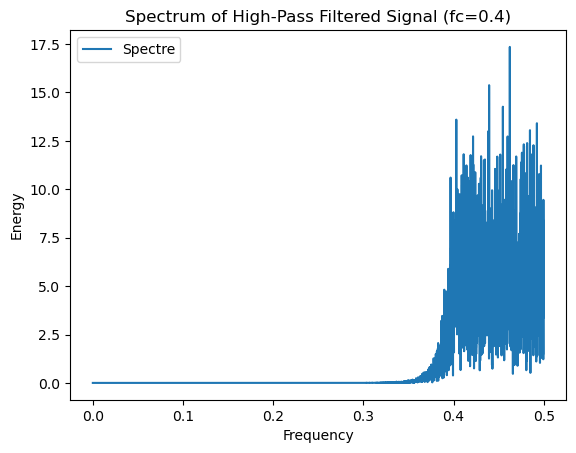

Detected Signature: [ 1.  1.  1.  1.  1. -1.  1. -1.]
Detection Accuracy with High-Pass Filter (fc=0.4): 37.50%


In [64]:
# Example
frequencies_high = [0.2, 0.4] 
character = 'g' 

# Watermarking the original audio signal s_audio
rng = np.random.default_rng(seed=42)
s_m_audio, S = tatoue1d(0, s_audio, character, rng, alpha=1/15)


for fc in frequencies_high:
    print(f"\nTesting High-Pass Filter with fc = {fc}")
    rng = np.random.default_rng(seed=42)
    detected_signature, accuracy = evaluate_highpass_attack(s_m_audio, S, rng, fc, character)
    print(f"Detected Signature: {detected_signature}")
    print(f"Detection Accuracy with High-Pass Filter (fc={fc}): {accuracy * 100:.2f}%")


## 2. Watermarking of color image
This part of the project consists of watermarking an image file. We'll follow the instructions of the project:

### 2.1 YCrCb space:

In [70]:
#!{sys.executable} -m pip install opencv-python #had some hard time using the cv2 lib

In [72]:
import cv2

Let's implement the function rgb2cyrcb.
The goal of this function is to convert a color image between two color spaces: RGB and YCrCb d Depending on the 'sens' parameter as follows:
If sens = 0, the function converts an image from RGB to YCrCb.
If sens = 1, it converts an image from YCrCb back to RGB.

For that we'll use the given predefined matrices to transform between RGB and YCrCb: trs and trinv

In [74]:
def rgb2ycrcb(sens, img):
    trs = np.array([[0.2989, -0.1688, 0.5],
                    [0.5866, -0.3312, -0.4184],
                    [0.1145, 0.5, -0.0816]]).T
    trinv = np.linalg.inv(trs)
    res = np.zeros_like(img)
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    if sens == 0:
        # RGB -> YCrCb
        Y = trs[0, 0] * R + trs[0, 1] * G + trs[0, 2] * B
        Cb = trs[1, 0] * R + trs[1, 1] * G + trs[1, 2] * B
        Cr = trs[2, 0] * R + trs[2, 1] * G + trs[2, 2] * B
        
        res[:, :, 0], res[:, :, 1], res[:, :, 2] = Y, Cr, Cb

    elif sens == 1:
        # YCrCb -> RGB
        Y, Cr, Cb = R, G, B 
        Rp = trinv[0, 0] * Y + trinv[0, 1] * Cb + trinv[0, 2] * Cr
        Gp = trinv[1, 0] * Y + trinv[1, 1] * Cb + trinv[1, 2] * Cr
        Bp = trinv[2, 0] * Y + trinv[2, 1] * Cb + trinv[2, 2] * Cr
        
        res[:, :, 0], res[:, :, 1], res[:, :, 2] = Rp, Gp, Bp

    return res


Now that we coded our function, let's import our image and apply our code on it

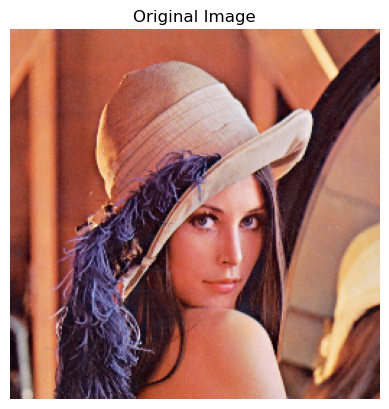

In [76]:
#Importing the image

img = np.double(cv2.imread("lenna.ppm"))


img_rgb = img[:, :, ::-1]
# Display the image using matplotlib (maybe if i fix cv2 later)
plt.imshow(img_rgb / 255)
plt.title("Original Image")
plt.axis('off')
plt.show()




Let's Apply RGB to YCrCb transformation


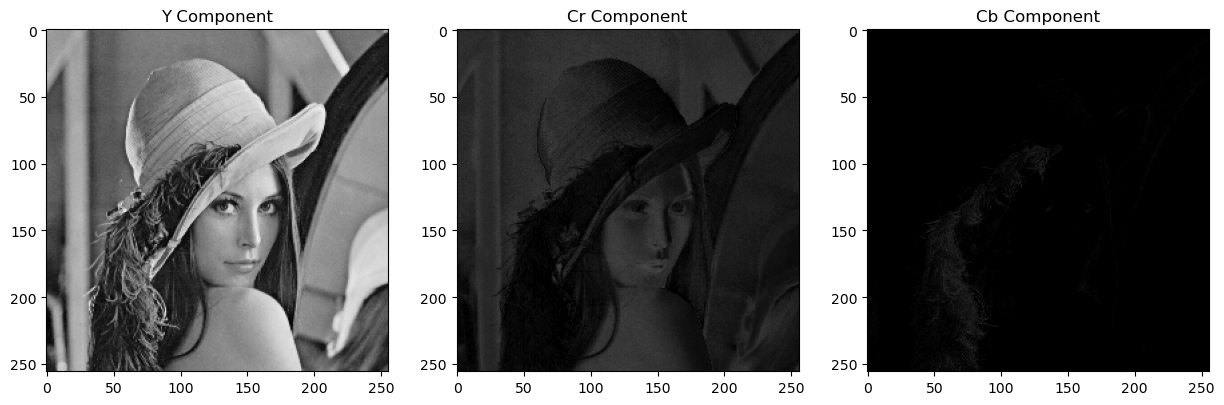

In [80]:
ycrcb_image = rgb2ycrcb(0, img_rgb)

Y = ycrcb_image[:, :, 0]
Cr = ycrcb_image[:, :, 1]
Cb =ycrcb_image[:, :, 2]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(Y, cmap='gray', vmin=0, vmax=255)
plt.title("Y Component")

plt.subplot(1, 3, 2)
plt.imshow(Cr, cmap='gray', vmin=0, vmax=255)
plt.title("Cr Component")

plt.subplot(1, 3, 3)
plt.imshow(Cb, cmap='gray', vmin=0, vmax=255)
plt.title("Cb Component")

plt.show()

Since the Y component represents the brightness or luminance of the image the output is coherent with what we are expecting : a black-and-white version of the original version.


As for the Cr component, it highlights the 'red part'(It primarily captures red chrominance information). The output doesn't look like the original image but we can see areas with different intensity levels based on the amount of 'red' in the image. 

Last but not least, the Cb component that shows the blue channel, it displays the distribution of blue in the image


 Now let's evaluate the suitability of each component for watermarking based on the given two key factors:

1. Robustness: The ability of the watermark to withstand image manipulations and attacks .
2. Invisibility: Ensuring that the watermark is imperceptible to the human eye.

**for the Y Component**

When displayed, this component is just a black and white version of the original image. Therefore modifications to the Y component are likely to be noticeable. That's why it's not ideal for invisible watermarking, as even small changes can degrade the visual quality.

**for the Cr & Cb components**

As shown in there respective plots, those components look less structured and more abstract than the Y component, with no or less recognizable details of the original image.
Therefore, modifications in Cr and Cb are less perceptible.

Since the Cr component is the most abstract one, I am thinking that it's the best candidate for watermarking if we consider invisibility and robustness.

### 2.2 2D extension of the watermarking process by spread spectrum:

#### 2.2.1 Creating the signature

In [82]:
def generate_signature(n):
    signature = np.random.choice([1, -1], size=(n, n))
    return signature

In [84]:
# Example: Generate a 2x2 signature matrix (to follow the diagram)
n = 2
signature_matrix = generate_signature(n)

print("Generated Signature Matrix (4x4):")
print(signature_matrix)

Generated Signature Matrix (4x4):
[[ 1  1]
 [-1 -1]]


#### 2.2.2 Upsampling the signature using a factor cr

In [86]:
def upsample_2d(signature, cr):
    pattern= np.repeat(np.repeat(signature, cr, axis=0), cr , axis =1)
    return pattern


In [88]:
# Example: Let's  upsample it by a factor of 2
cr = 2
upsampled_pattern = upsample_2d(signature_matrix, cr)

print("Original Signature Matrix (4x4):")
print(signature_matrix)
print("\nUpsampled Pattern (8x8):")
print(upsampled_pattern)

Original Signature Matrix (4x4):
[[ 1  1]
 [-1 -1]]

Upsampled Pattern (8x8):
[[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


#### 2.2.3 Creating the gaussian modulation sequence

In [90]:
def create_gaussian_modulation(cr):
    p = np.random.normal(loc=0, scale=1, size=(cr, cr))
    return p


In [92]:
# Example
p = create_gaussian_modulation(cr)

# Display the Gaussian modulation sequence
print(f"Gaussian Modulation Sequence p (Period = {cr}):")
print(p)

Gaussian Modulation Sequence p (Period = 2):
[[-0.84450045 -1.09652828]
 [-0.13663011  0.35496562]]


In [98]:
# Tiling the Gaussian sequence p to match the size of the upsampled pattern b
upsampled_pattern_b = upsample_2d(signature_matrix, cr)
tiled_p = np.tile(p, (upsampled_pattern_b.shape[0] // cr, upsampled_pattern_b.shape[1] // cr))
print(f"\nTiled Modulation Pattern p ({tiled_p.shape[0]}x{tiled_p.shape[1]}):")
print(tiled_p)


Tiled Modulation Pattern p (4x4):
[[-0.84450045 -1.09652828 -0.84450045 -1.09652828]
 [-0.13663011  0.35496562 -0.13663011  0.35496562]
 [-0.84450045 -1.09652828 -0.84450045 -1.09652828]
 [-0.13663011  0.35496562 -0.13663011  0.35496562]]


#### 2.2.4 Watermark w

In [100]:
def create_watermark_pattern(b, p, alpha):

    amplified_b = alpha * b
    w = amplified_b * p
    
    return w


In [102]:
# Create the watermark pattern w
alpha = 0.5
W = create_watermark_pattern(upsampled_pattern_b, tiled_p, alpha)
print("\nWatermark Pattern W (4x4):")
print(W)


Watermark Pattern W (4x4):
[[-0.42225022 -0.54826414 -0.42225022 -0.54826414]
 [-0.06831506  0.17748281 -0.06831506  0.17748281]
 [ 0.42225022  0.54826414  0.42225022  0.54826414]
 [ 0.06831506 -0.17748281  0.06831506 -0.17748281]]


Since we created our watermark and chose to add it to the Cr component, let's code the function

In [104]:
def embed_watermark_in_cr(ycrcb_image, watermark_w):


    Y = ycrcb_image[:, :, 0]
    Cr = ycrcb_image[:, :, 1]
    Cb = ycrcb_image[:, :, 2]

    Cr_watermarked = Cr + watermark_w

    watermarked_ycrcb = np.stack((Y, Cr_watermarked, Cb), axis=-1)

    return watermarked_ycrcb



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


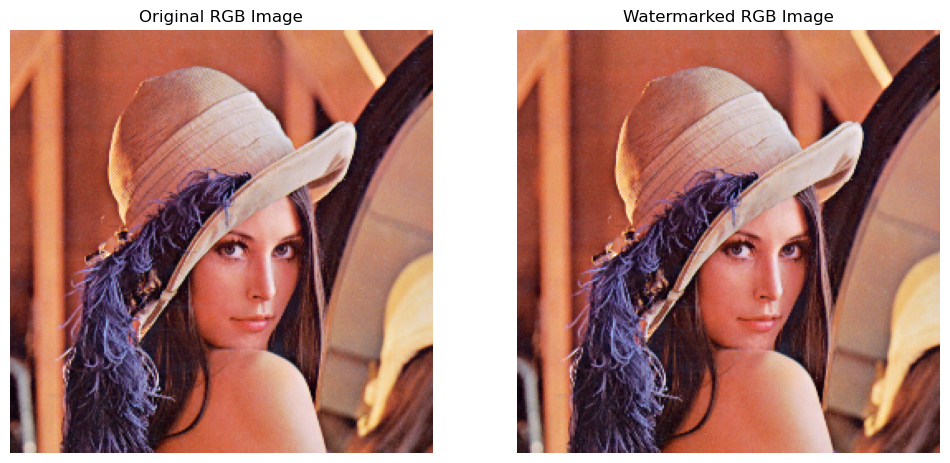

In [106]:
img = np.double(cv2.imread("lenna.ppm"))

# Convert from BGR to RGB for correct color visualization
img_rgb = img[:, :, ::-1]

# Convert the RGB image to YCrCb format
ycrcb_image = rgb2ycrcb(0, img_rgb)

# Generate the Watermark
n = 16
cr = 16 
# because 16*16 = 256 and we want to match the dimensions of the image (thanks python errors for telling me what's wrong)

# Creating a small 2x2 signature matrix
signature_matrix = generate_signature(n)

# Upsampling the signature
upsampled_pattern_b = upsample_2d(signature_matrix, cr)

# Creating a Gaussian modulation sequence)
p = create_gaussian_modulation(cr)

# Tiling p to match the size of  b
tiled_p = np.tile(p, (upsampled_pattern_b.shape[0] // cr, upsampled_pattern_b.shape[1] // cr))

# Creating the final watermark pattern W
alpha = 0.5 
W = create_watermark_pattern(upsampled_pattern_b, tiled_p, alpha)

#  Embedding the Watermark into the Cr Component
watermarked_ycrcb_image = embed_watermark_in_cr(ycrcb_image, W)

# Converting the Watermarked YCrCb Image Back to RGB
watermarked_rgb_image = rgb2ycrcb(1, watermarked_ycrcb_image)

# Displaying the Original and Watermarked Images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb / 255)
plt.title("Original RGB Image")
plt.axis('off')

# Displaying Watermarked Image
plt.subplot(1, 2, 2)
plt.imshow(watermarked_rgb_image / 255)
plt.title("Watermarked RGB Image")
plt.axis('off')

plt.show()

I personnaly can't see a difference between the original image and the watermarked one (This reminds me of my childhood games)
Can we say that the operation was succesful then? Or that I'll need to check my eyes and make an appointment with the ophthalmologist !

Now let's continue with the detection

In [108]:
def create_private_signature(ID):

    # Converting the first two characters into a 16-bit binary string
    ast = bin(ord(ID[0]) * pow(2, 8) + ord(ID[1]))[2:].zfill(16) 
    # {-1, 1}
    signature_bits = np.array([1 if bit == '1' else -1 for bit in ast])
    # 4x4 matrix
    signature_matrix = signature_bits.reshape((4, 4))
    
    return signature_matrix


In [110]:
# Example: Creating a private signature using two characters 'A' and 'B'
ID = "AB"
signature_matrix = create_private_signature(ID)

# Displaying the generated 4x4 signature matrix
print("Generated 4x4 Signature Matrix:")
print(signature_matrix)


Generated 4x4 Signature Matrix:
[[-1  1 -1 -1]
 [-1 -1 -1  1]
 [-1  1 -1 -1]
 [-1 -1  1 -1]]


Let's now implement the tatoue2d function


The function tatoue2d will have two primary modes:

1. Watermarking (sens = 0):

Embed a 4x4 signature matrix into the Cr component of the image using spread spectrum.
Inputs: img, ID, rng, and alpha.
Outputs: res (watermarked image) and a (binary signature matrix).

2. Decoding (sens = 1):

Extract the 4x4 signature matrix from a watermarked image and compare it to the original signature.
Inputs: img, ID, and rng.
Outputs: res (extracted binary signature matrix) and a (original binary signature matrix).

In [112]:
def tatoue2d(sens, img, ID, rng, alpha):
    # Creating the 4x4 signature matrix from the given ID
    a = create_private_signature(ID)

    # Calculating the upsampling factor cr such that 4xcr matches the image size
    cr = int(np.size(img, 0) // 4)

    # Generating the Gaussian modulation sequence p
    p = rng.normal(loc=0, scale=1, size=(cr, cr))

    if sens == 0:
        # Watermarking Process
        b = np.repeat(np.repeat(a, cr, axis=0), cr, axis=1)

        # Tiling p to match the size of b (4*cr x 4*cr)
        p_tiled = np.tile(p, (b.shape[0] // cr, b.shape[1] // cr))

        # Modulating the upsampled pattern b with p_tiled and amplify with alpha
        w = alpha * b * p_tiled

        # 4. Embedding the watermark into the image by adding w 
        res = img + w

        return res, a

    elif sens == 1:
        # Decoding Process
        p_tiled = np.tile(p, (img.shape[0] // cr, img.shape[1] // cr))
        extracted_pattern = img * p_tiled
        
        # Downsampling to obtain the 4x4 signature matrix
        extracted_signature = np.zeros((4, 4))
        for i in range(4):
            for j in range(4):
                extracted_signature[i, j] = np.sum(extracted_pattern[i * cr:(i + 1) * cr, j * cr:(j + 1) * cr])
        # {-1, 1}
        res = np.sign(extracted_signature)

        return res, a

Let's apply this function on out image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


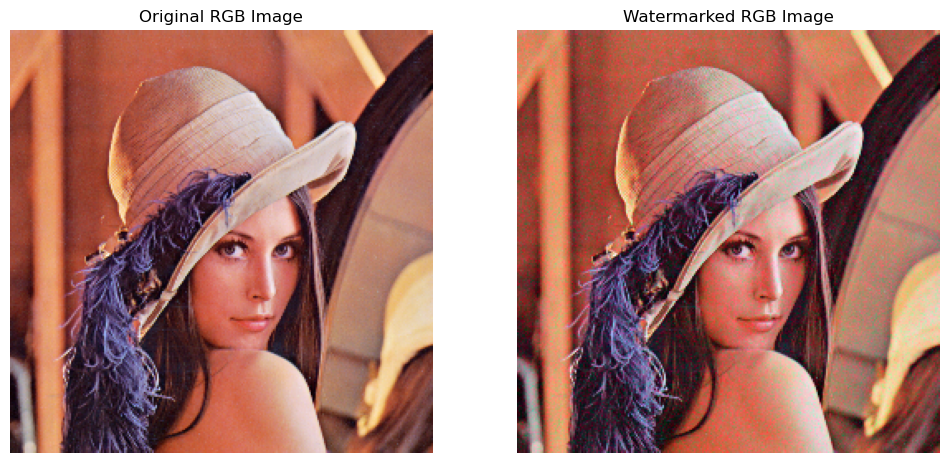

In [116]:
ID = "AB"
alpha = 15
cr = 64  # 256 / 4
Cr_component = ycrcb_image[:, :, 1]  
# Watermarking
watermarked_Cr, signature_matrix = tatoue2d(0, Cr_component, ID, rng, alpha)
watermarked_ycrcb_image = ycrcb_image.copy()
watermarked_ycrcb_image[:, :, 1] = watermarked_Cr

watermarked_rgb_image = rgb2ycrcb(1, watermarked_ycrcb_image)

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb / 255)
plt.title("Original RGB Image")
plt.axis('off')

# Watermarked Image
plt.subplot(1, 2, 2)
plt.imshow(watermarked_rgb_image / 255)
plt.title("Watermarked RGB Image")
plt.axis('off')

plt.show()

The difference is very subtle, let's apply the detection process, for that we'll start the processus from the beginning to make sure evrything is alright: generating the signature, watermarking and decoding then evaluation errors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original 4x4 Signature Matrix (Before Watermarking):
[[-1  1 -1 -1]
 [-1 -1 -1  1]
 [-1  1 -1 -1]
 [-1 -1  1 -1]]


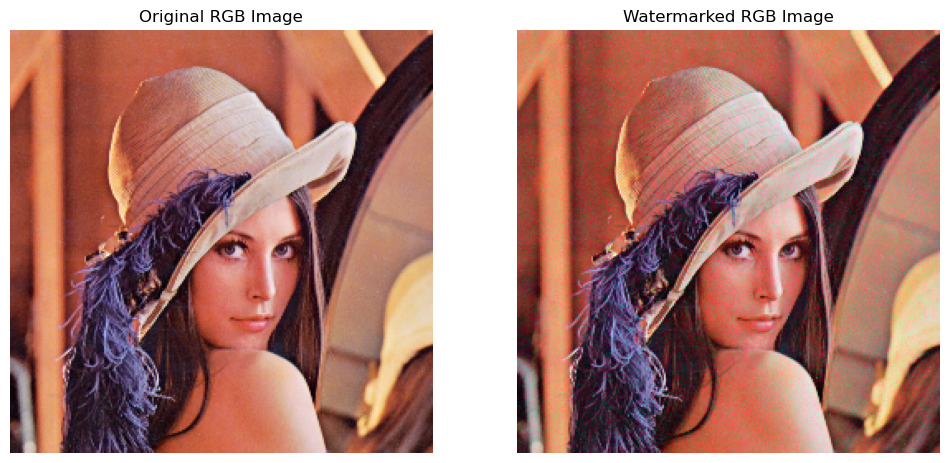

Original 4x4 Signature Matrix:
[[-1  1 -1 -1]
 [-1 -1 -1  1]
 [-1  1 -1 -1]
 [-1 -1  1 -1]]

Extracted 4x4 Signature Matrix:
[[-1.  1. -1. -1.]
 [-1. -1. -1.  1.]
 [-1.  1. -1. -1.]
 [-1. -1.  1. -1.]]

Binary Error Rate: 0.00


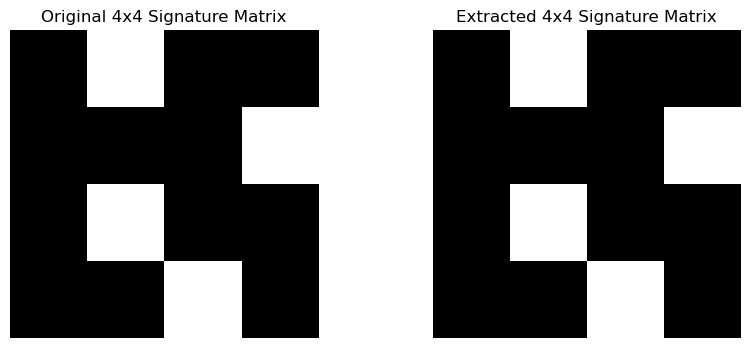

In [118]:
# Creating a Fixed Random Seed for the Random Generator
fixed_seed = 42
rng = np.random.default_rng(seed=fixed_seed)

# Generating the Original Signature Matrix Using a Fixed Seed
ID = "AB"
alpha = 15
cr = 64

# Creating the signature matrix
signature_matrix = create_private_signature(ID)
print("Original 4x4 Signature Matrix (Before Watermarking):")
print(signature_matrix)

# Watermarking
watermarked_Cr, _ = tatoue2d(0, Cr_component, ID, rng, alpha)


watermarked_ycrcb_image = ycrcb_image.copy()
watermarked_ycrcb_image[:, :, 1] = watermarked_Cr
watermarked_rgb_image = rgb2ycrcb(1, watermarked_ycrcb_image)

# Display the watermarked image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb / 255)
plt.title("Original RGB Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(watermarked_rgb_image / 255)
plt.title("Watermarked RGB Image")
plt.axis('off')
plt.show()

# Detection Process Using the Same Random Generator
rng = np.random.default_rng(seed=fixed_seed)  # Reinitializing rng with the same seed for consistency
ycrcb_image_marked = rgb2ycrcb(0, watermarked_rgb_image)
watermarked_Cr_detect = ycrcb_image_marked[:, :, 1]

# Decoding
extracted_signature, _ = tatoue2d(1, watermarked_Cr_detect, ID, rng, alpha)

error_rate = np.sum(extracted_signature != signature_matrix) / signature_matrix.size

print("Original 4x4 Signature Matrix:")
print(signature_matrix)

print("\nExtracted 4x4 Signature Matrix:")
print(extracted_signature)

print(f"\nBinary Error Rate: {error_rate:.2f}")

# Display the Original and Extracted Signatures
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(signature_matrix, cmap='gray')
plt.title("Original 4x4 Signature Matrix")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extracted_signature, cmap='gray')
plt.title("Extracted 4x4 Signature Matrix")
plt.axis('off')
plt.show()


Let's now test the procedure with Y and Cb components to check if there will be any differences (I'm expecting it's a yes obviously)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


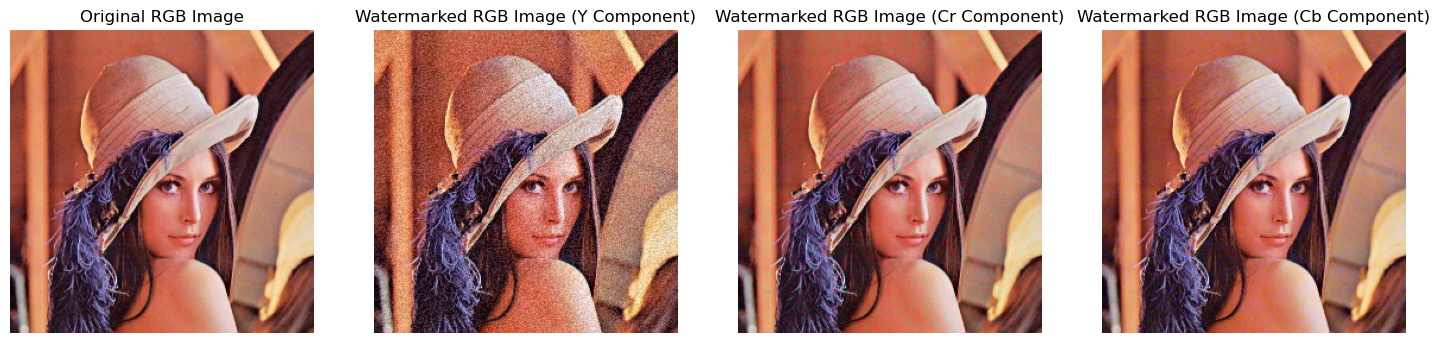

In [128]:

# Watermarking the Y Component
Y_component = ycrcb_image[:, :, 0]
watermarked_Y, _ = tatoue2d(0, Y_component, ID, rng, alpha)
watermarked_ycrcb_Y = ycrcb_image.copy()
watermarked_ycrcb_Y[:, :, 0] = watermarked_Y
watermarked_rgb_Y = rgb2ycrcb(1, watermarked_ycrcb_Y)

# Watermarking the Cr component
Cr_component = ycrcb_image[:, :, 1]
watermarked_Cr, _ = tatoue2d(0, Cr_component, ID, rng, alpha)
watermarked_ycrcb_Cr = ycrcb_image.copy()
watermarked_ycrcb_Cr[:, :, 1] = watermarked_Cr
watermarked_rgb_Cr = rgb2ycrcb(1, watermarked_ycrcb_Cr)


# Watermarking the Cb Component
Cb_component = ycrcb_image[:, :, 2]
watermarked_Cb, _ = tatoue2d(0, Cb_component, ID, rng, alpha)
watermarked_ycrcb_Cb = ycrcb_image.copy()
watermarked_ycrcb_Cb[:, :, 2] = watermarked_Cb
watermarked_rgb_Cb = rgb2ycrcb(1, watermarked_ycrcb_Cb)



plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(img_rgb / 255)
plt.title("Original RGB Image")
plt.axis('off')

# Watermarked Image (Y Component)
plt.subplot(1, 4, 2)
plt.imshow(watermarked_rgb_Y / 255)
plt.title("Watermarked RGB Image (Y Component)")
plt.axis('off')

# Watermarked Image (Cr Component)
plt.subplot(1, 4, 3)
plt.imshow(watermarked_rgb_Cr / 255)
plt.title("Watermarked RGB Image (Cr Component)")
plt.axis('off')

# Watermarked Image (Cb Component)
plt.subplot(1, 4, 4)
plt.imshow(watermarked_rgb_Cb / 255)
plt.title("Watermarked RGB Image (Cb Component)")
plt.axis('off')

plt.show()


We can see an obvious difference between the visibility of the watermark when embeded for the Y component and the other ones (Cb and Cr).
This emphasizes that we made a good choice at the beginning by chosing to watermark the Cr component .


## 2.3 Robustness

In [130]:
#saving
watermarked_rgb_image = watermarked_rgb_Cr
cv2.imwrite(
    "lennaWatermarked.ppm", 
    cv2.normalize(
        watermarked_rgb_image, 
        np.zeros_like(watermarked_rgb_image), 
        np.min(watermarked_rgb_image), 
        np.max(watermarked_rgb_image), 
        cv2.NORM_MINMAX
    )
)
print("Watermarked image saved as 'lennaW.ppm'.")


Watermarked image saved as 'lennaW.ppm'.


Let's apply attacks:

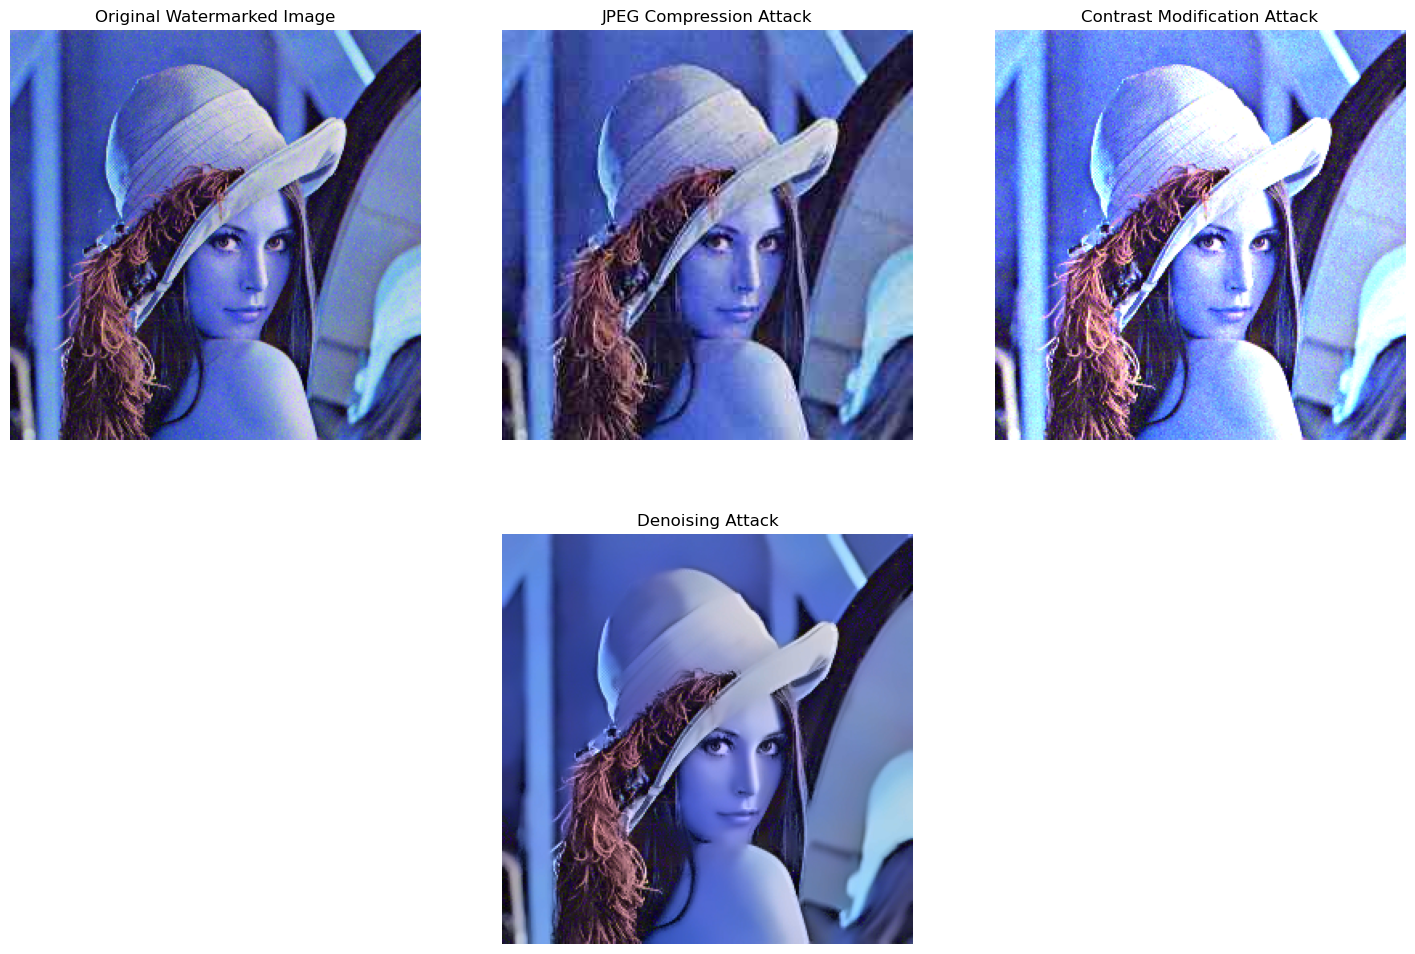

In [132]:
watermarked_img = cv2.imread("lennaWatermarked.ppm")

# 1. JPEG Compression Attack
cv2.imwrite("lennaWatermarked_compressed.jpg", watermarked_img, [int(cv2.IMWRITE_JPEG_QUALITY), 30])
compressed_img = cv2.imread("lennaWatermarked_compressed.jpg")

# 2. Contrast Modification Attack
contrast_img = cv2.convertScaleAbs(watermarked_img, alpha=1.5, beta=0)  # Increase contrast by factor of 1.5



# 4. Denoising Attack
denoised_img = cv2.fastNlMeansDenoisingColored(watermarked_img, None, 10, 10, 7, 21)


# Display the Attacked Images
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(watermarked_img, cv2.COLOR_BGR2RGB))
plt.title("Original Watermarked Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
plt.title("JPEG Compression Attack")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(contrast_img, cv2.COLOR_BGR2RGB))
plt.title("Contrast Modification Attack")
plt.axis('off')


plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title("Denoising Attack")
plt.axis('off')

plt.show()


# External resources used - Credits-

For this project, and as I couldn't assist to the first sessions where the 'lesson' was explained, I used a lot of external resources that I will cite here:

- Wikepedia
- ChatGpt
- Youtube
- Google
- Digital Watermarking -Techniques and Trends- book

I enjoyed working on this project and I will definitely restudy it and give it much more time to fully understand all the aspects of audio and image watermarking.
I also tried to watermark my favorite song for fun as I didn't have much time to tackle the last part called 3. Annexe: Spread spectrum for the watermarking.
Here is my code for the song watermarking. 

# Watermarking myfavorite song for fun

Detected stereo audio. Processing both channels separately.


C:\Users\Admin\AppData\Local\Temp\ipykernel_13076\3132480700.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


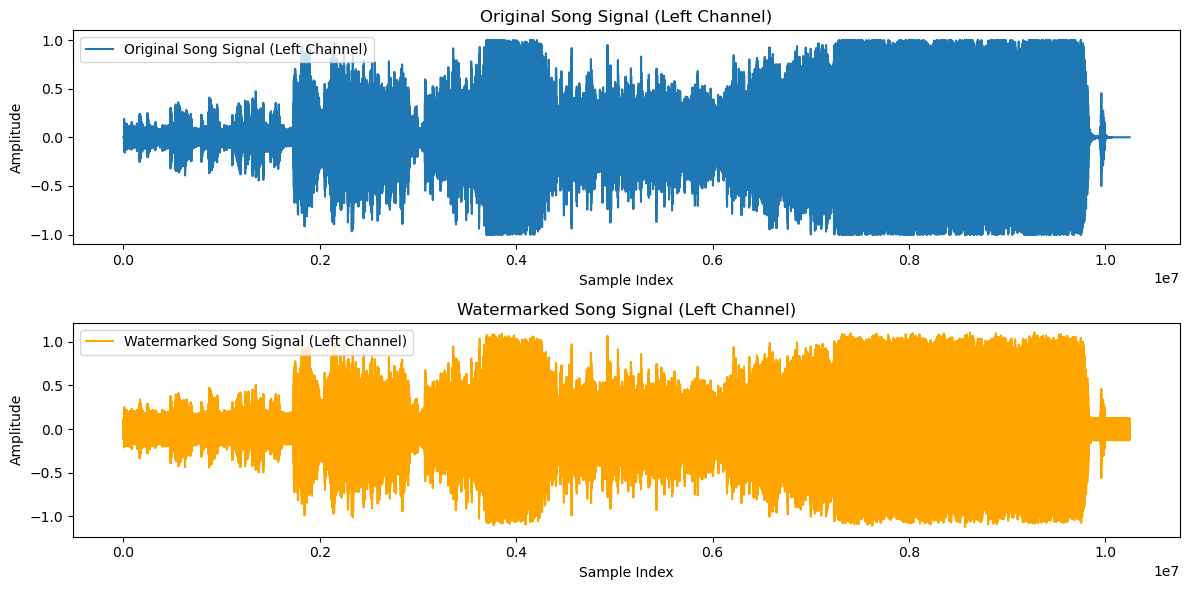

Sampling frequency of song (song_samplerate): 48000 Hz
Original song shape: (10248192, 2)
Watermarked song shape: (10248192, 2)
First 20 samples of the original song (Left Channel): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 20 samples of the watermarked song (Left Channel): [ 0.05794221  0.04455476  0.04537022  0.01172057  0.07708605  0.00629657
  0.03190764 -0.02978667 -0.03189491 -0.04640861 -0.02558234  0.00176766
 -0.0286598  -0.05018271  0.02178648 -0.02034504  0.00142246 -0.04800056
  0.0278965   0.01005155]


In [134]:
# Loading the stereo song file

song_samplerate, song = wavfile.read("song.wav")

# Checking if the song is stereo
if len(song.shape) == 2 and song.shape[1] == 2:
    print("Detected stereo audio. Processing both channels separately.")
    stereo = True
else:
    stereo = False

# Normalizing the stereo song
if song.dtype == np.int16:  # Typical for WAV files
    song = song / 32768.0  # Convert 16-bit PCM to range [-1, 1]

# Adjusting the watermark sequence w length to match the song's length
song_watermark = np.resize(w, song.shape[0])

# Handling stereo by duplicating the watermark for both channels
if stereo:
    song_watermark = np.column_stack((song_watermark, song_watermark))

# Watermarking the song 
alpha = 1 / 30
watermarked_song = song + alpha * song_watermark

# Visualization
plt.figure(figsize=(12, 6))

# Original Song Signal Plot
plt.subplot(2, 1, 1)
plt.plot(song[:, 0] if stereo else song, label='Original Song Signal (Left Channel)')
plt.title("Original Song Signal (Left Channel)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

# Watermarked Song Signal Plot
plt.subplot(2, 1, 2)
plt.plot(watermarked_song[:, 0] if stereo else watermarked_song, label='Watermarked Song Signal (Left Channel)', color='orange')
plt.title("Watermarked Song Signal (Left Channel)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

#Saving the watermarked stereo song using distinct variables
watermarked_song_int16 = np.int16(watermarked_song * 32768)  # Convert back to 16-bit PCM for saving
wavfile.write("watermarked_song.wav", song_samplerate, watermarked_song_int16)

# Comparison
print(f"Sampling frequency of song (song_samplerate): {song_samplerate} Hz")
print(f"Original song shape: {song.shape}")
print(f"Watermarked song shape: {watermarked_song.shape}")

# Print first 20 samples of the left channel for quick inspection
print(f"First 20 samples of the original song (Left Channel): {song[:20, 0] if stereo else song[:20]}")
print(f"First 20 samples of the watermarked song (Left Channel): {watermarked_song[:20, 0] if stereo else watermarked_song[:20]}")

It's giving the vintage vibe, like if I'm listenning to my favorite song while it's raining and using a radio. I may investigate later what happens when I modify the value of alpha.